# Checking classical force and the orbit of mercury in two-body system

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import argrelextrema
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
poss = np.loadtxt("../positions/mercury.txt")

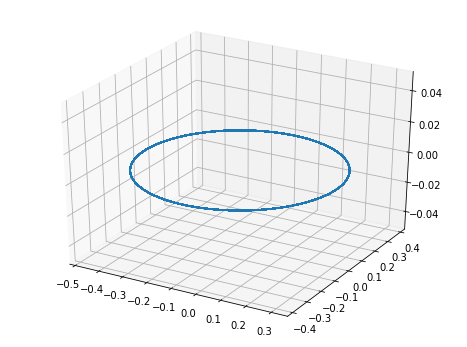

In [3]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
ax.plot(poss[0, :], poss[1, :], poss[2, :])
plt.show()

In [4]:
rposs = np.linalg.norm(poss, 2, axis=0)
local_minima_idx = argrelextrema(rposs, np.less)

minrposs = rposs.take(local_minima_idx)
print("Analytical perihelion = 0.3075")
print("Minimum perihelion    = {}".format(minrposs.min()))
print("Maximum perihelion    = {}".format(minrposs.max()))

Analytical perihelion = 0.3075
Minimum perihelion    = 0.3074999967505925
Maximum perihelion    = 0.30749999999849376


In [5]:
peri_poss = poss.take(local_minima_idx, axis=1)[:, 0]

# ALL z values must be zero
assert np.sum(np.abs(peri_poss[2, :])) == 0.0

tan_peri = peri_poss[1, :] / peri_poss[0, :]

peri = np.arctan(tan_peri)

arcsecond = np.pi / 648000
arcdiff = (peri[-1] - peri[0]) / arcsecond
print("Differnce in perihelion in arcseconds: {}".format(arcdiff))

Differnce in perihelion in arcseconds: -65.10653810656777


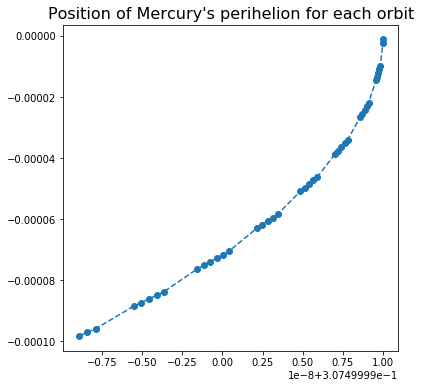

In [6]:
plt.figure(figsize=(6,6))
plt.title(r"Position of Mercury's perihelion for each orbit",
         fontsize=16)
plt.plot(peri_poss[0, :], peri_poss[1, :], "--o")
plt.show()